<a href="https://colab.research.google.com/github/Washik-Uddin-Ahmed-Mollah/cv/blob/ML%2FDL-projects/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Task1: Sentiment analysis on Naver Movie Review dataset</h1>
<p>by Washik Uddin Ahmed Mollah, sopohomore, KAIST, department of CS and EE</p>

<h3>Download the data from Kaggle</h3>
<p>I am doing this task on colab. For the next section of code to work the file kaggle.json must be loaded into memory. I will push this file into github so that everyone can access it.</p>

In [1]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
! pip install kaggle

In [3]:
mkdir ~/.kaggle

In [4]:
cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download soohyun/naver-movie-review-dataset

 97% 8.00M/8.26M [00:00<00:00, 24.7MB/s]
100% 8.26M/8.26M [00:00<00:00, 25.9MB/s]


In [7]:
! unzip naver-movie-review-dataset.zip

Archive:  naver-movie-review-dataset.zip
  inflating: ratings_test.txt        
  inflating: ratings_train.txt       


<h3>Prepare training dataset</h3>
<p>The following block of code reads from the file ratings_train.txt. The structure of the data is movie_id \t review \t label(meaning positive or negative). Skipping the first row, which contains the column titles, I append the reviews to the list training_reviews, and the labels to the list training_sentiment. The labels are initially of string type, so they are converted to float.</p>

In [30]:
with open("/content/ratings_train.txt", 'r') as f:
    lines = f.readlines()

training_reviews = []
training_sentiment = []

for line in lines:
    temp_list = line.split('\t')
    training_reviews.append(temp_list[1])
    training_sentiment.append(temp_list[2][0])
  
training_reviews = training_reviews[1:]
training_sentiment = training_sentiment[1:]

training_sentiment = [float(x) for x in training_sentiment]

158


<h3>Prepare test dataset</h3>


In [34]:
with open("/content/ratings_test.txt", 'r') as fo:
  lines = fo.readlines()

testing_reviews = []
testing_sentiment = []

for line in lines:
  temp_list = line.split('\t')
  testing_reviews.append(temp_list[1])
  testing_sentiment.append(temp_list[2][0])

testing_reviews = testing_reviews[1:]
testing_sentiment = testing_sentiment[1:]

testing_sentiment = [float(x) for x in testing_sentiment]
testing_sentiment[0:10]

[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0]

<p>Import necessary libraries</p1>

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

<p>Some reviews are much longer than others. The following code allows us to pick a maximum length of the reviews that we will use for training</p>

In [38]:
from statistics import mean

longest_review = max(training_reviews, key=len)
print("longest_review: " + str(len(longest_review)))
print("average length of review: " + str(mean([len(i) for i in training_reviews])))

longest_review: 158
average length of review: 35.23739333333333


In [39]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

<p>Note that in the following lines of code the tokenizer is fit only to the training reviews and not to the testing reviews.</p>

In [42]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_reviews)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_reviews)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_reviews)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [43]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_sentiment)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_sentiment)

<h3>Build the model</h3>

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [17]:
print(len(testing_padded))
print(len(testing_labels))
print(len(training_padded))
print(len(training_labels))

50000
50000
150000
150000


<h3>Training</h3>

In [46]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs,validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
4688/4688 - 16s - loss: 0.5042 - accuracy: 0.7372 - val_loss: 0.4219 - val_accuracy: 0.7932 - 16s/epoch - 3ms/step
Epoch 2/30
4688/4688 - 15s - loss: 0.3907 - accuracy: 0.8096 - val_loss: 0.4101 - val_accuracy: 0.7967 - 15s/epoch - 3ms/step
Epoch 3/30
4688/4688 - 14s - loss: 0.3741 - accuracy: 0.8165 - val_loss: 0.4054 - val_accuracy: 0.8026 - 14s/epoch - 3ms/step
Epoch 4/30
4688/4688 - 14s - loss: 0.3668 - accuracy: 0.8189 - val_loss: 0.4066 - val_accuracy: 0.7980 - 14s/epoch - 3ms/step
Epoch 5/30
4688/4688 - 14s - loss: 0.3619 - accuracy: 0.8224 - val_loss: 0.4103 - val_accuracy: 0.7966 - 14s/epoch - 3ms/step
Epoch 6/30
4688/4688 - 15s - loss: 0.3586 - accuracy: 0.8236 - val_loss: 0.4080 - val_accuracy: 0.7990 - 15s/epoch - 3ms/step
Epoch 7/30
4688/4688 - 14s - loss: 0.3567 - accuracy: 0.8233 - val_loss: 0.4077 - val_accuracy: 0.7980 - 14s/epoch - 3ms/step
Epoch 8/30
4688/4688 - 14s - loss: 0.3542 - accuracy: 0.8261 - val_loss: 0.4122 - val_accuracy: 0.7955 - 14s/epoch - 3

<h3>ROC curve and AUC</h3>
<ul><li>True positive: proportion of positives identified correctly</li>
<li>false negative: proportion of wrongly classified negative labels</li>
</ul>
<p>The ROC curve is a graph of true positive rate plotted against false positive rate as the threshold is varied. It is used to analyse the performance of a binary classifier at different thresholds. The AUC is simply the area under the ROC curve, colored blue in the graph, that ranges from 0 to 1. It is useful for comparing the performace of different models.</p>

In [50]:
from sklearn.metrics import roc_curve
y_pred = model.predict(testing_padded).ravel()
fpr, tpr, thresholds = roc_curve(testing_labels, y_pred)

In [51]:
from sklearn.metrics import auc
auc = auc(fpr, tpr)

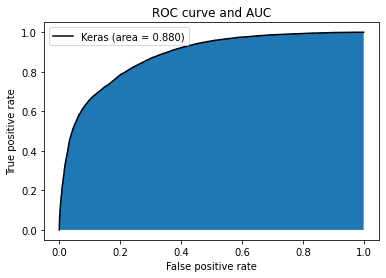

In [58]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc), color='black')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve and AUC')
plt.legend(loc='best')
plt.fill_between(fpr,tpr)
plt.show()